# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of serious accidents. The safety team classes serious accidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these serious accidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [49]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
import statsmodels.api as sm

plt.rc("font", size=12)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [50]:
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [51]:
# accidents.shape # (91199, 27)

In [52]:
accidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,91199.0,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,-1.189258,52.351073,2.768232,1.835272,1.267382,4.121558,4.220320,790.666071,5.256001,...,5.551771,220.231987,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205
std,0.0,1.367786,1.327573,0.456682,0.677272,0.681473,1.932200,1.443475,1580.817743,1.684878,...,1.015113,913.692832,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,2020.0,-2.107789,51.457237,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,2020.0,-1.046912,51.763385,3.000000,2.000000,1.000000,4.000000,4.000000,34.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,-0.125238,53.297386,3.000000,2.000000,1.000000,6.000000,6.000000,538.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,2020.0,1.756257,60.541144,3.000000,13.000000,41.000000,7.000000,6.000000,9174.000000,9.000000,...,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [53]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head(5)

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most serious accidents happen?
2. Are there any patterns in the time of day/ day of the week when serious accidents occur?
3. What characteristics stand out in serious accidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [54]:
df = accidents # assign dataset to a new variable 'df'

In [55]:
# some missingness in longitude and/or latitude but since they are less than 0.3, we can ignore
df.isnull().sum()*100 / len(df)

accident_index                             0.000000
accident_year                              0.000000
accident_reference                         0.000000
longitude                                  0.015351
latitude                                   0.015351
accident_severity                          0.000000
number_of_vehicles                         0.000000
number_of_casualties                       0.000000
date                                       0.000000
day_of_week                                0.000000
time                                       0.000000
first_road_class                           0.000000
first_road_number                          0.000000
road_type                                  0.000000
speed_limit                                0.000000
junction_detail                            0.000000
junction_control                           0.000000
second_road_class                          0.000000
second_road_number                         0.000000
pedestrian_c

In [56]:
# create a new categorical variable - 0 for < 3 casualities and 1 for >=3 casualities
df['serious_accident'] = np.where(df['number_of_casualties'] >= 3, 1, 0)
df['serious_accident'].value_counts()

0    86382
1     4817
Name: serious_accident, dtype: int64

***New categorical has two classes***
* 1 if number of casualities >= 3 and 0 if number of casualities < 3  
* Out of all the records (n=91199), 5.3% of the records had number of casualities equals to 3 and more. 

## Data Engineering

In [75]:
## Split date into month and day

In [ ]:
## Split time into a categorical variable

In [ ]:
## 

## Let's do some exploratory analysis!

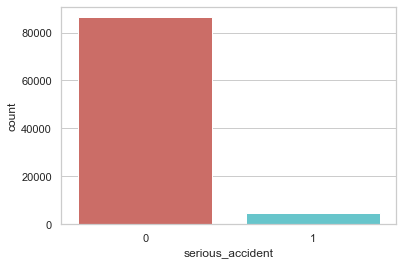

In [57]:
sns.countplot(x='serious_accident', data=df, palette='hls')
plt.show()

## 1. What time of day and day of the week do most serious accidents happen?

In [67]:
df[['serious_accident', 'day_of_week']].groupby('serious_accident').mean()

,day_of_week
serious_accident,
0,4.11918
1,4.16421


***Insight 1:*** From the output above, it seems like most of the serious accidents happen on Wednesday.

## 2. Are there any patterns in the time of day/ day of the week when serious accidents occur?

Text(0, 0.5, 'Frequency')

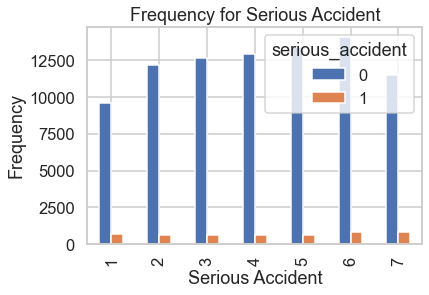

In [62]:
%matplotlib inline
pd.crosstab(df.day_of_week,df.serious_accident).plot(kind='bar')
plt.title('Frequency for Serious Accident')
plt.xlabel('Serious Accident')
plt.ylabel('Frequency')

When looking at the day of week, the pattern is not obvious, but let's look at the time of the day. 

Text(0, 0.5, 'Frequency')

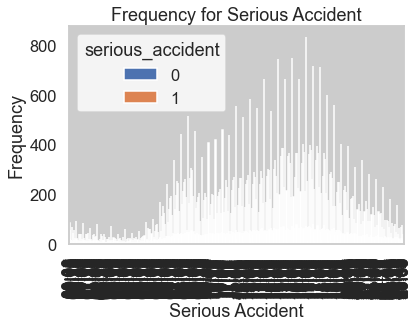

In [68]:
%matplotlib inline
pd.crosstab(df.time,df.serious_accident).plot(kind='bar')
plt.title('Frequency for Serious Accident')
plt.xlabel('Serious Accident')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

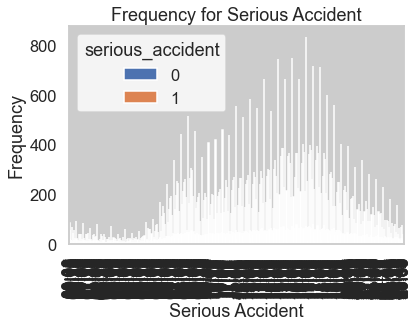

In [71]:
plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
%matplotlib inline
pd.crosstab(df.time,df.serious_accident).plot(kind='bar')
plt.title('Frequency for Serious Accident')
plt.xlabel('Serious Accident')
plt.ylabel('Frequency')

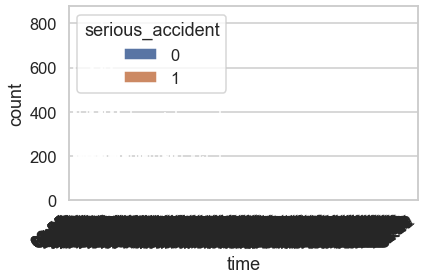

In [73]:
%matplotlib inline
ax = sns.countplot(x="time", hue='serious_accident', data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## 3. What characteristics stand out in serious accidents compared with other accidents?

## 4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents?